In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor, MLPClassifier
import matplotlib.pyplot as plt

In [7]:
data = pd.read_excel("Data.xlsx", skiprows=1)
X = data.drop(columns=['Input1', 'Input2', 'Input3', 'Input4', 'Input5', 'Input6'], axis =1)
y = data[['Output1', 'Output2', 'Output3']]
X.columns = X.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
model = MLPRegressor(hidden_layer_sizes=(20, 20), activation='relu', solver='adam', max_iter=200, tol=1e-4, validation_fraction=0.15)
model.fit(X_train, y_train)
y_train = model.predict(X_train)
y_pred = model.predict(X_test)

#Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(y_pred)
print("Mean Squared Error:", mse)
print("R2:", r2_score(y_test, y_pred, sample_weight=None, force_finite=True))

[[4.69632143e+02 7.00731004e+02 3.75017690e+01]
 [1.06001897e+00 1.22628303e+02 9.80283141e+01]
 [3.40087470e+02 2.49464302e+01 3.10918376e+00]
 ...
 [3.61386132e+02 1.59598204e+03 6.39697749e+01]
 [1.47066140e+00 2.46023714e+02 9.84251020e+01]
 [4.57906992e-01 1.24267698e+02 9.92936486e+01]]
Mean Squared Error: 0.018624016160682013
R2: 0.9999888832930544


In [8]:
num_data_points_to_print = min(200, len(y_test))  # 200 data points or the size of y_test

output_df = pd.DataFrame({'Actual_Concentration,Cf(mg/L)': y_test.iloc[:num_data_points_to_print, 0].values,
                          'Predicted_Concentration,Cf(mg/L)': y_pred[:num_data_points_to_print, 0],
                          'Actual_Adsorption capacity(mg/g)': y_test.iloc[:num_data_points_to_print, 1].values,
                          'Predicted_Adsorption capacity(mg/g)': y_pred[:num_data_points_to_print, 1],
                          'Actual_Adsorption efficiency(%)': y_test.iloc[:num_data_points_to_print, 2].values,
                          'Predicted_Adsorption efficiency(%)': y_pred[:num_data_points_to_print, 2]})
output_df

,"Actual_Concentration,Cf(mg/L)","Predicted_Concentration,Cf(mg/L)",Actual_Adsorption capacity(mg/g),Predicted_Adsorption capacity(mg/g),Actual_Adsorption efficiency(%),Predicted_Adsorption efficiency(%)
0,469.68,469.632143,700.8,700.731004,37.376000,37.501769
1,1.00,1.060019,122.5,122.628303,98.000000,98.028314
2,340.08,340.087470,24.8,24.946430,2.834286,3.109184
3,68.88,69.116184,77.8,77.826862,31.120000,31.201873
4,737.68,737.956691,655.8,655.616312,26.232000,26.307504
...,...,...,...,...,...,...
195,119.68,119.765285,325.8,325.777065,52.128000,52.193525
196,15.96,15.870688,585.1,585.019968,93.616000,93.626514
197,4.48,4.334003,113.8,113.714089,91.040000,91.148058
198,39.20,39.292668,152.0,151.981386,60.800000,60.839209


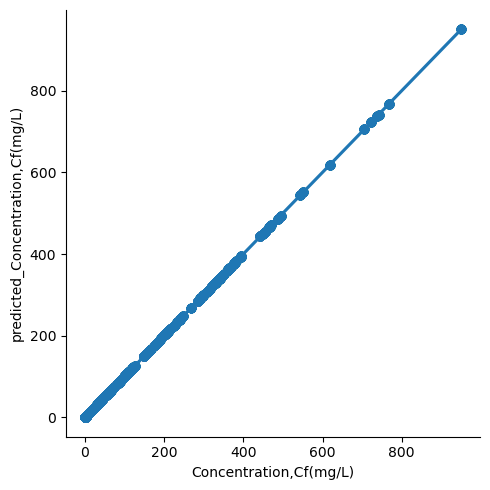

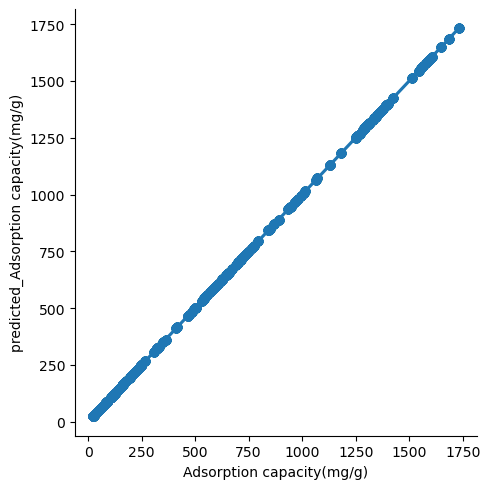

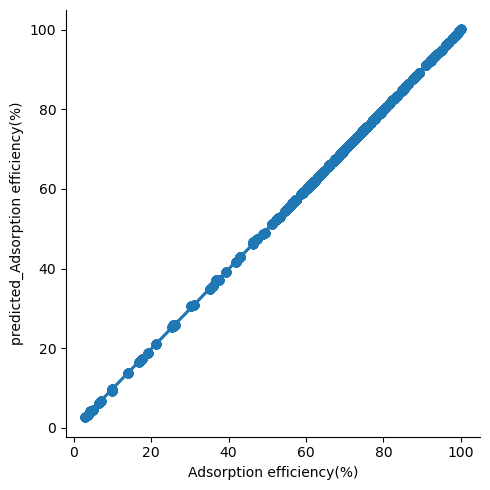

In [5]:
import seaborn as sns
df = pd.read_excel("predicted_data_with_inputs.xlsx")

# Regression plot for Output1, output 2, and output 3
sns.lmplot(x='Concentration,Cf(mg/L)', y ='predicted_Concentration,Cf(mg/L)', data = df)
sns.lmplot(x='Adsorption capacity(mg/g)', y ='predicted_Adsorption capacity(mg/g)', data = df)
sns.lmplot(x='Adsorption efficiency(%)', y ='predicted_Adsorption efficiency(%)', data = df)
plt.tight_layout()
plt.show()

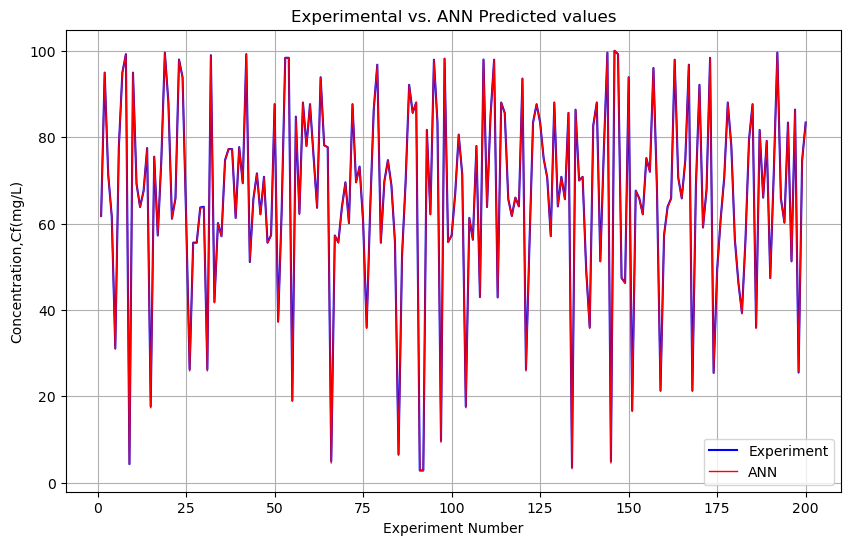

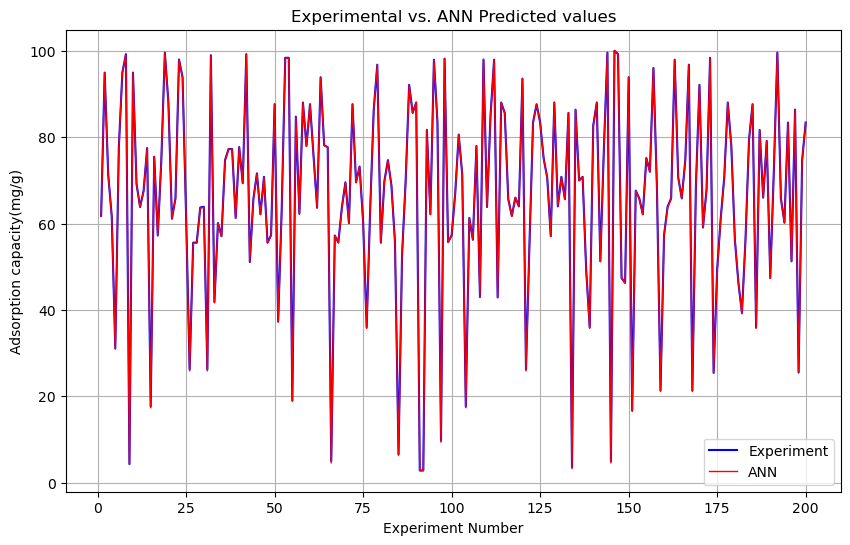

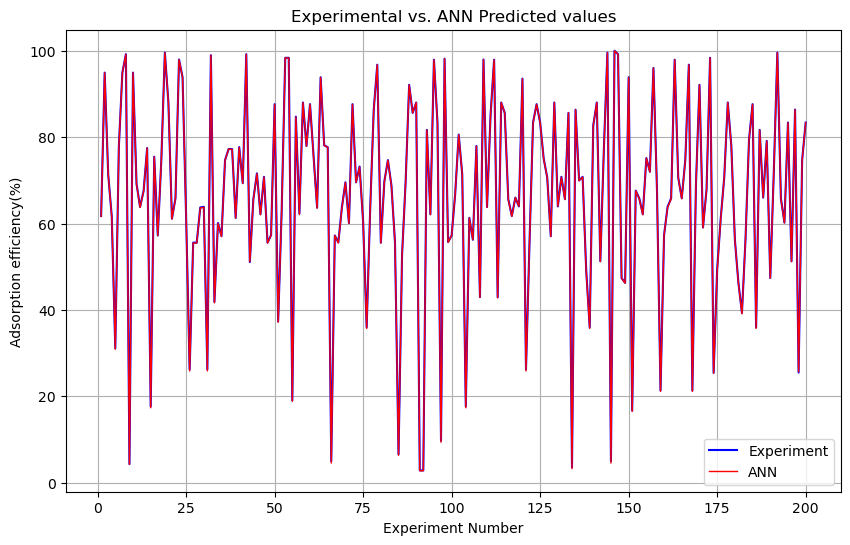

In [12]:
df = pd.read_excel('predicted_data_with_inputs.xlsx')

# experiment numbers, Output1 values, and predicted Output1 values
experiment_numbers = df['Experiment'][:200]
output1_values = df['Concentration,Cf(mg/L)'][:200]
predicted_output1_values = df['predicted_Concentration,Cf(mg/L)'][:200]

# experiment numbers, Output2 values, and predicted Output2 values
experiment_numbers = df['Experiment'][:200]
output1_values = df['Adsorption capacity(mg/g)'][:200]
predicted_output1_values = df['predicted_Adsorption capacity(mg/g)'][:200]

# experiment numbers, Output2 values, and predicted Output2 values
experiment_numbers = df['Experiment'][:200]
output1_values = df['Adsorption efficiency(%)'][:200]
predicted_output1_values = df['predicted_Adsorption efficiency(%)'][:200]

 # plot
plt.figure(figsize=(10, 6))
plt.plot(experiment_numbers, output1_values, label='Experiment', linestyle='-', color = 'blue')
plt.plot(experiment_numbers, predicted_output1_values, label='ANN', linestyle='-', color = 'red', linewidth=1)
plt.xlabel('Experiment Number')
plt.ylabel('Concentration,Cf(mg/L)')
plt.title('Experimental vs. ANN Predicted values')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(experiment_numbers, output1_values, label='Experiment', linestyle='-', color = 'blue')
plt.plot(experiment_numbers, predicted_output1_values, label='ANN', linestyle='-', color = 'red', linewidth=1)
plt.xlabel('Experiment Number')
plt.xlabel('Experiment Number')
plt.ylabel('Adsorption capacity(mg/g)')
plt.title('Experimental vs. ANN Predicted values')
plt.legend()
plt.grid()
plt.show()


 # plot
plt.figure(figsize=(10, 6))
plt.plot(experiment_numbers, output1_values, label='Experiment', linestyle='-', color = 'blue')
plt.plot(experiment_numbers, predicted_output1_values, label='ANN', linestyle='-', color = 'red', linewidth=1)
plt.xlabel('Experiment Number')
plt.ylabel('Adsorption efficiency(%)')
plt.title('Experimental vs. ANN Predicted values')
plt.legend()
plt.grid()
plt.show()